   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Statistical Summary:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809  

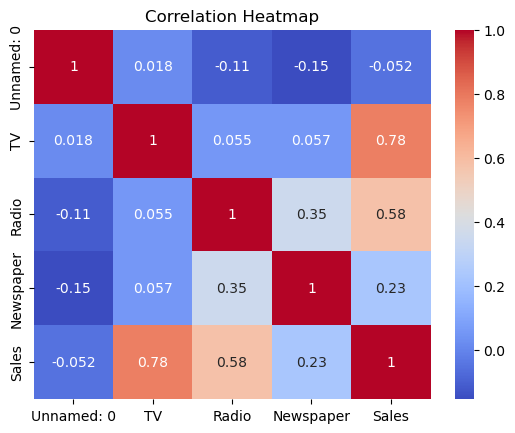


Model Evaluation:
Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]
R² Score: 0.899438024100912
MSE: 3.1740973539761046


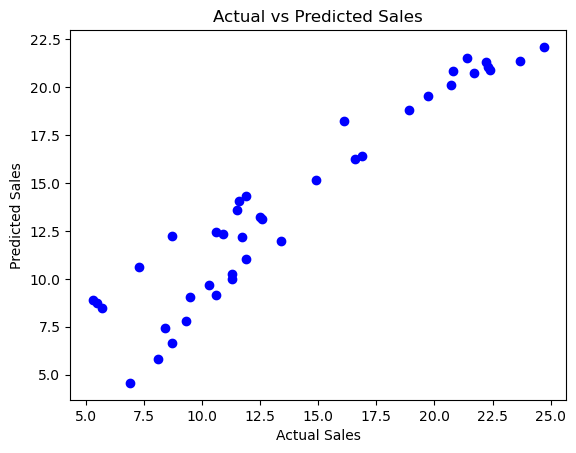

Enter TV advertising spend:  12
Enter Radio advertising spend:  13
Enter Newspaper advertising spend:  30



📢 Predicted Sales: 6.06


In [3]:
# 📊 Sales Prediction using Linear Regression (Advertising Dataset)

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv("advertising.csv")   # Make sure advertising.csv is in the same folder
print(df.head())

# Step 3: Data Exploration
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Features & Target
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("\nModel Evaluation:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Step 9: Visualization
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Step 10: Predict for New Input (User Input)
tv = float(input("Enter TV advertising spend: "))
radio = float(input("Enter Radio advertising spend: "))
newspaper = float(input("Enter Newspaper advertising spend: "))

new_data = pd.DataFrame([[tv, radio, newspaper]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = model.predict(new_data)[0]
print(f"\n📢 Predicted Sales: {predicted_sales:.2f}")
